In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#### Uncomment to read-in the data

# # Reading in the data

url = "https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_lightcurves.csv"
url1 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_labels.csv'
transient_lc = pd.read_csv(url)
transient_labels = pd.read_csv(url1)

In [15]:
# Removing the datasests or labels with uncertain labels [e.g '/', '?', 'not Unclear']

uncertain = ['/','?']

newlabel = []
for i in range(len(transient_labels.Classification)):
    
    if transient_labels.Classification[i] == 'Unclear':
        
        newlabel.append(i)
    
    for k in transient_labels.Classification[i]:
        
        
        if k in uncertain:
            
            
            newlabel.append(i)
            
# print(len(newlabel))                    
# Getting unique indices since some are duplicated        
newlabel = np.unique(newlabel)


# Removing the indices stored in the list above from
# the transient_label data

# print(len(newlabel))
new_transient_label = transient_labels.drop(newlabel)

sm = 0
for lb in np.unique(transient_labels.Classification.iloc[newlabel]):
    
    x = transient_labels[transient_labels['Classification']==lb]
    sm+=1
    print(lb,len(x))

AGN/Blazar 3
AGN/CV 2
AGN/Flare? 1
AGN/SN 6
AGN/SN? 4
AGN/Var 4
AGN/Var? 1
AGN/nothing? 1
AGN? 138
AMCVn? 1
Ast/CV? 2
Ast/Flare 1
Ast/Flare? 1
Ast/SN 4
Ast/SN? 1
Ast/Var 1
Ast/Var? 2
Ast/Var?? 1
Ast? 68
Blazar/AGN 4
Blazar/SN 1
Blazar? 19
CV/AGN 3
CV/AGN? 3
CV/Ast 4
CV/Ast? 1
CV/Blazar 1
CV/Flare 2
CV/SN 19
CV/SN? 1
CV/Var 5
CV/Var/Ast 1
CV/Var? 1
CV? 77
Comet/Ast? 1
Flare/CV 1
Flare/SN 2
Flare/SN? 1
Flare? 20
HPM/Var? 1
HPM? 3
Lensing/nothing? 1
Merger/CV? 1
Nothing/Lensing 1
Nova/CV 1
Nova? 1
O/Ne 1
SN/AGN 23
SN/AGN? 11
SN/Ast 10
SN/Ast? 2
SN/CV 36
SN/CV? 6
SN/TDE 6
SN/TDE? 1
SN/Var 3
SN/Var? 1
SN/nothing? 1
SN? 319
TDE? 3
Unclear 1
Var/AGN 1
Var/Artifact 1
Var/Ast 5
Var/Ast? 2
Var/Flare? 1
Var/Nothing 1
Var/Nova 1
Var/SN 2
Var/SN? 2
Var/nothing? 1
Var? 15
YSO? 5


In [16]:
new_transient_label

,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774
...,...,...
5533,Flare,711020070134114830
5534,SN,711020040154124879
5535,SN,711020040154110403
5537,SN,711011210104109439


# Plotting a pie chat/bar graph of the classes in the data

In [17]:
new_transient_label.head()

,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774


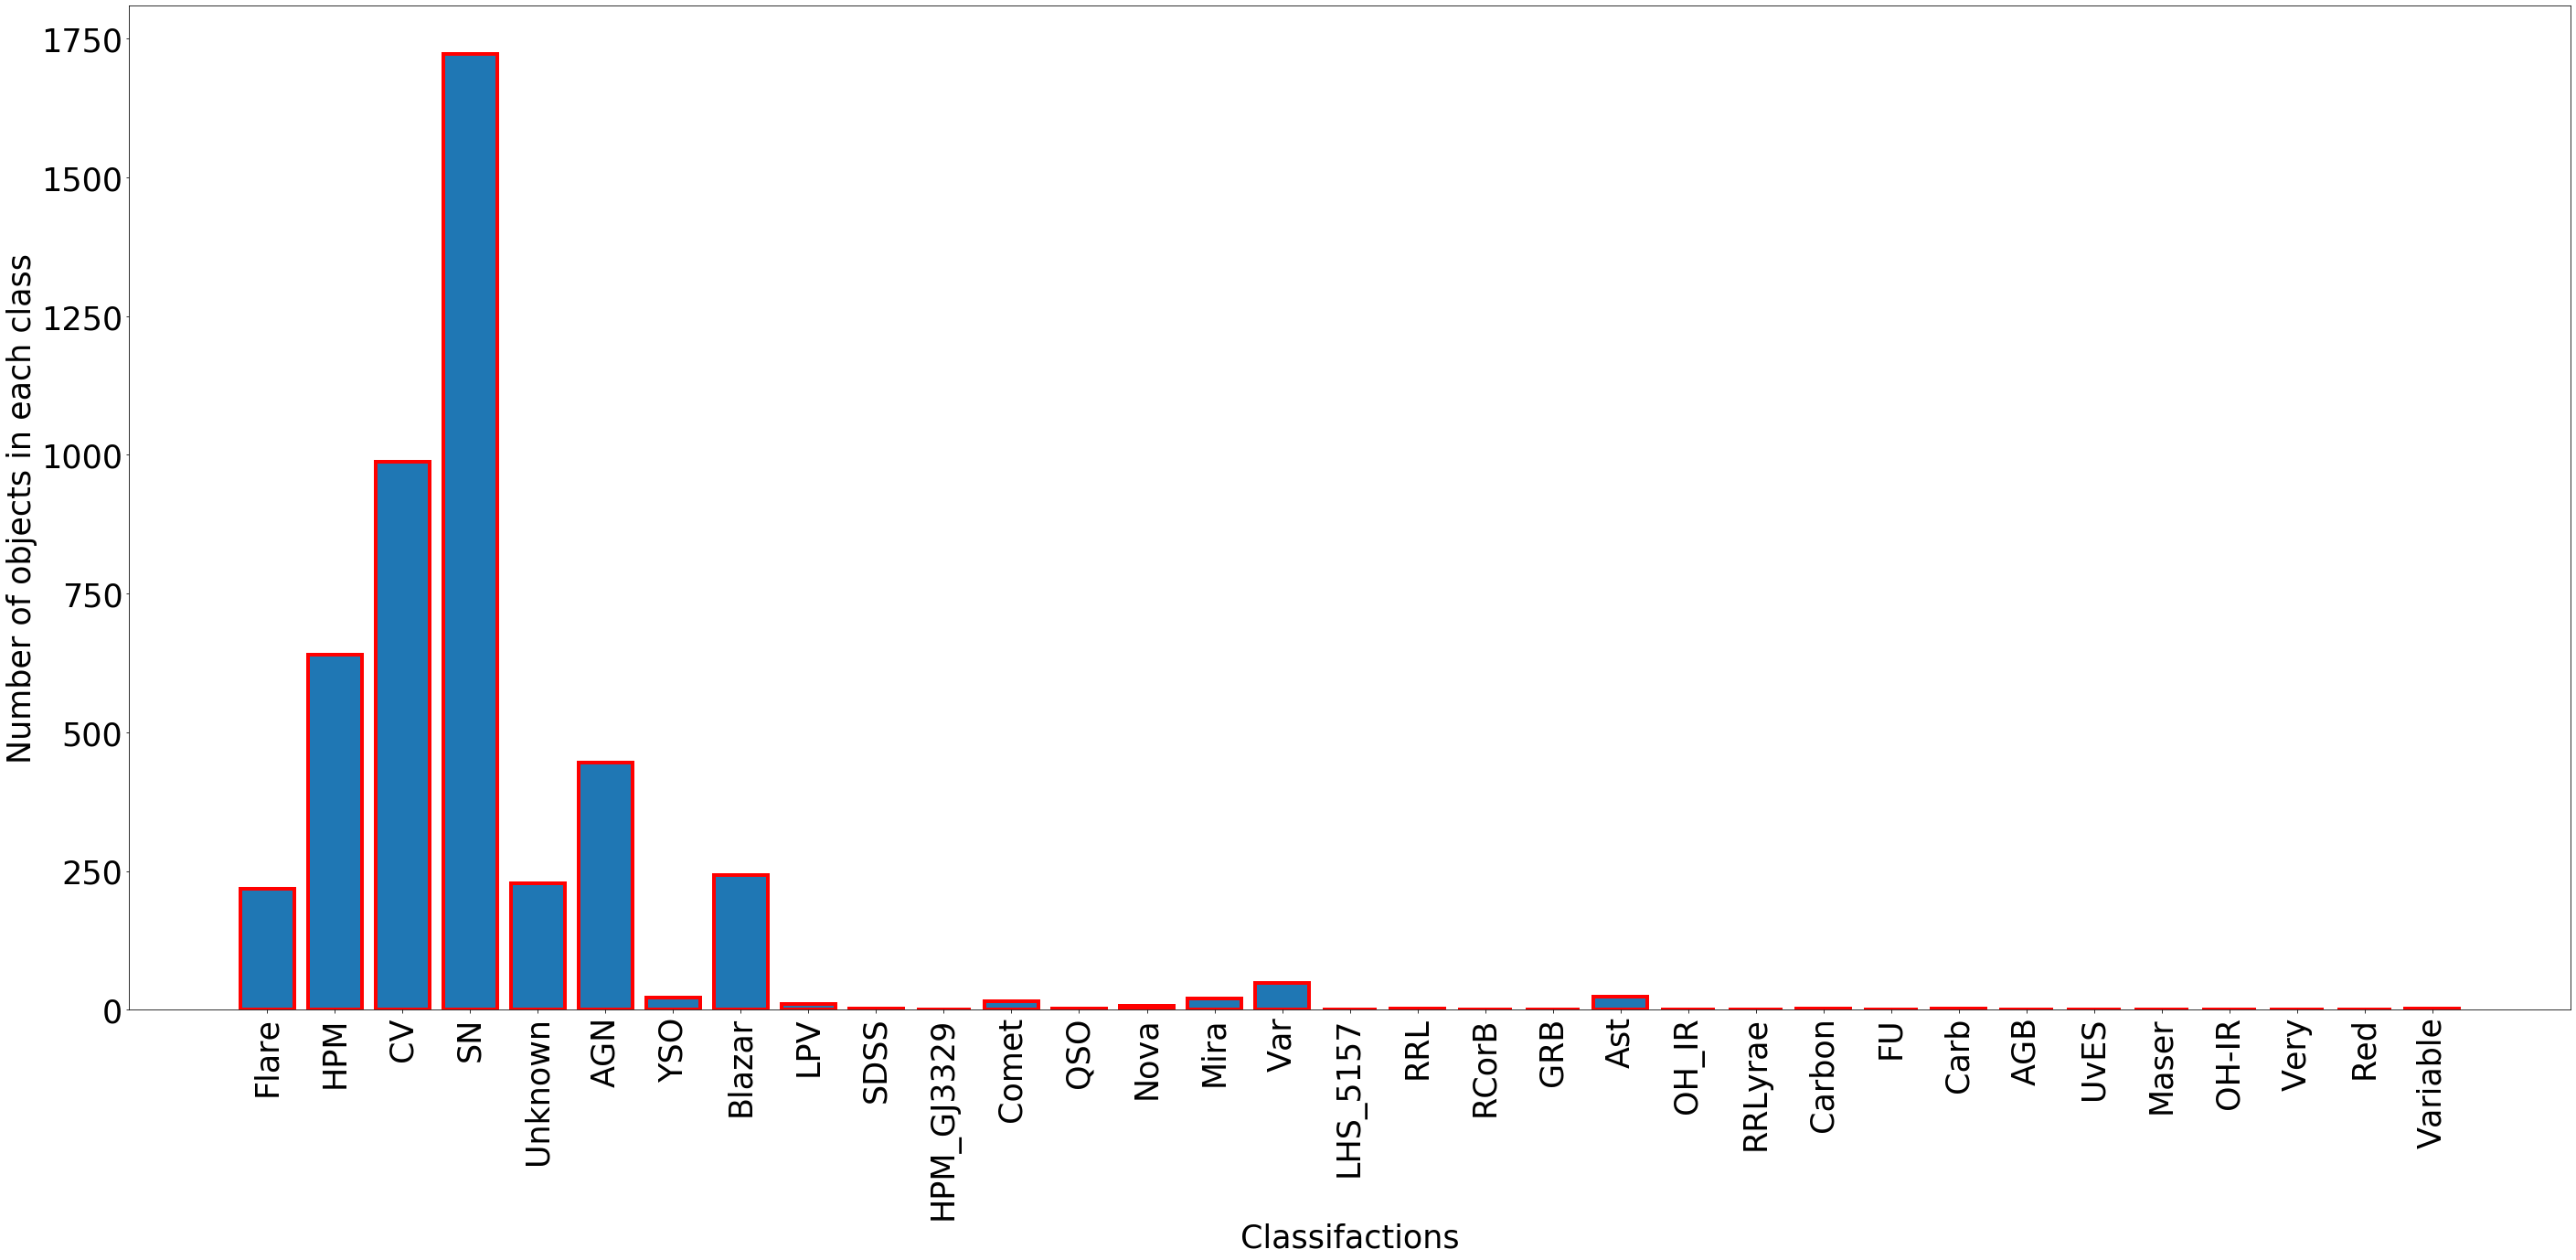

In [19]:
unique_labels=new_transient_label.Classification.unique()
len_labels = []
for i in unique_labels:
    x = new_transient_label[new_transient_label['Classification']==i]
    len_labels.append(x)


label_len = []
for i in range(len(len_labels)):
    
    label_len.append(len(len_labels[i]))
    


# plt.style.use('classic')
plt.rcParams.update({'font.size': 35})
plt.figure(figsize=(40,20))

plt.bar(unique_labels,label_len, width=0.8,edgecolor='r',linewidth=4)
plt.xticks(rotation=90)
plt.xlabel('Classifactions')
plt.ylabel('Number of objects in each class')
# plt.tight_layout()
plt.savefig('filter_class_bar.png',bbox_inches="tight",edgecolor='y',quality=100)
plt.tight_layout()
plt.show()

In [20]:
for i in range(len(unique_labels)):
    
    if unique_labels[i]=='Var':
        
        print('Number of unknown transients = {}'.format(label_len[i]))
        
# len(unique_labels)

Number of unknown transients = 49


In [21]:
# plt.pie?

# Getting Unique IDs from the data

In [22]:
transient_lc.shape

(440469, 5)

In [23]:
transient_lc.head()

,ID,observation_id,Mag,Magerr,MJD
0,TranID1409030010044114444,0,18.8765,0.166417,53766.089871
1,TranID1409030010044114444,1,20.0519,0.281733,53990.458866
2,TranID1409030010044114444,2,20.2199,0.295764,53996.286004
3,TranID1409030010044114444,3,21.1192,0.495390,54385.205789
4,TranID1409030010044114444,4,19.3289,0.195002,54355.282285


In [24]:
unique_ID=transient_lc.ID.unique()
len(unique_ID)

4869

In [25]:
# # Getting the Unique ID and storing them in a list

# unique_ID = []

# for k in range(1,len(transient_lc.ID)):

#     if transient_lc.ID.iloc[k-1] != transient_lc.ID.iloc[k]:

#         unique_ID.append(transient_lc.ID.iloc[k-1])

# # Appending the last data since the loop above goes
# # up to len(lc.ID)-1
# unique_ID.append(transient_lc.ID.iloc[-1])

In [26]:
Lc_len = [] # List to store the duration of the lc

d = []      # List to store data for a unique ID as
            # by the code above

    
#  Storing the datasets of the unique ID in a the 'd' 
#  list
for i in unique_ID:
    
    z = transient_lc[transient_lc['ID']==i]
    d.append(z)
    
    # calculating the duration of the lcs
    Lc_len.append(np.sort(z.MJD)[-1] - np.sort(z.MJD)[0])
    



# Ploting first 4 light curves of the unique IDs

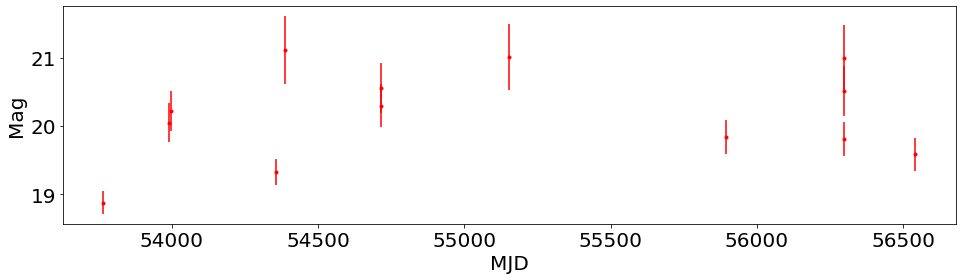

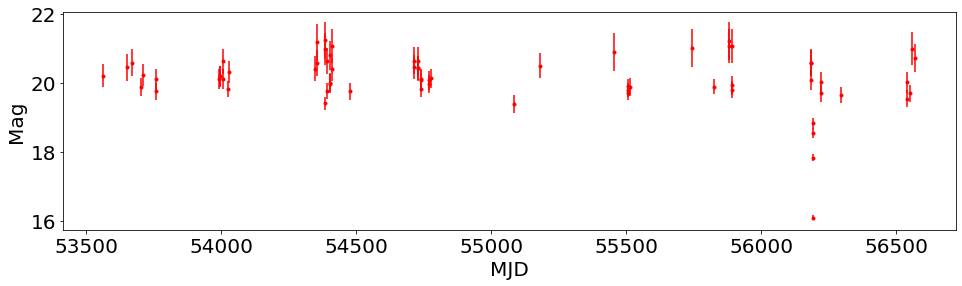

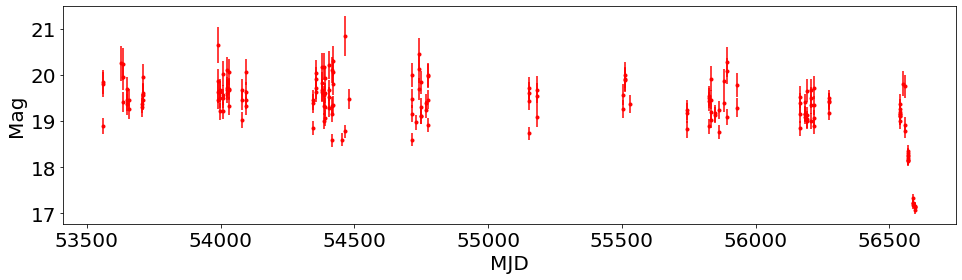

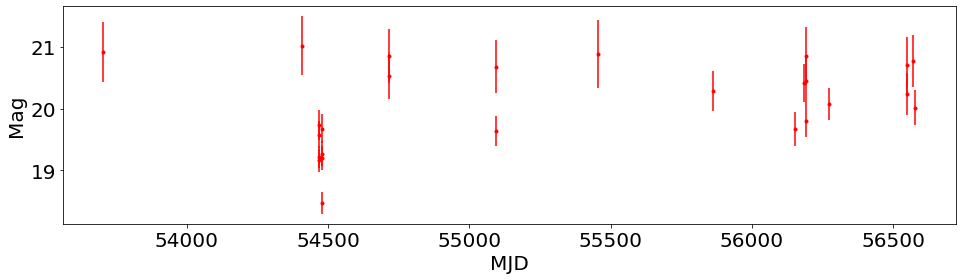

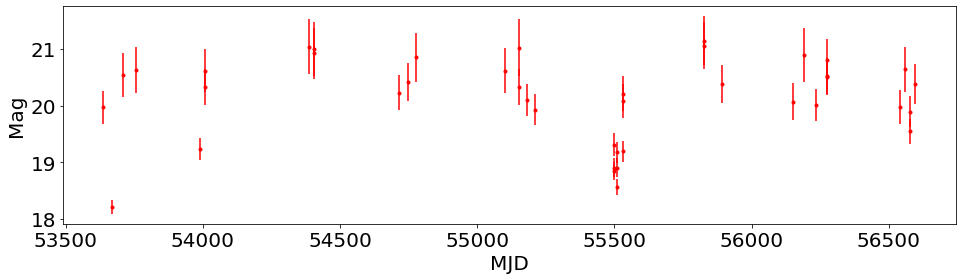

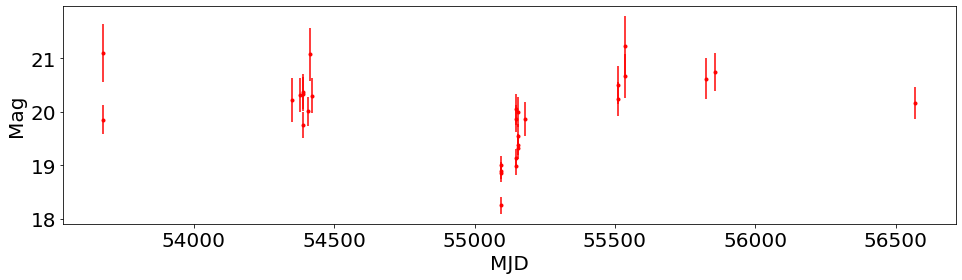

In [27]:
# Plotting light curves for the first 4 unique IDs as by the code above
random_lc = np.random.normal(0,len(unique_ID),5)
plt.rcParams.update({'font.size': 20})
for i in range(0,6):
    plt.figure(figsize=(16,4))
    plt.errorbar(d[i].MJD,d[i].Mag,yerr=d[i].Magerr,
                 fmt='.r',color='r')

    plt.xlabel('MJD')
    plt.ylabel('Mag')
    plt.savefig('Light_Curve'+str(i)+'.png',bbox_inches="tight")
    plt.show()

# Plotting a histogram with the light curve durations

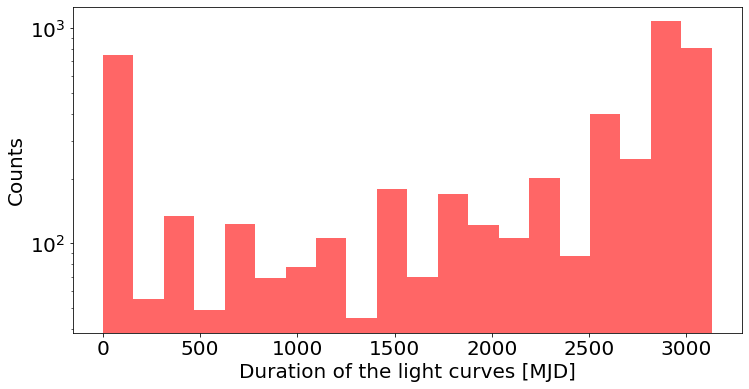

1979.8509865458616

In [28]:
plt.figure(figsize=(12,6))
plt.hist(Lc_len,color='red',alpha=0.6, bins=20)
plt.xlabel('Duration of the light curves [MJD]')
plt.ylabel('Counts')
plt.yscale('log')
plt.savefig('lc_duration.png',bbox_inches="tight")
plt.show()
np.average(Lc_len)

# Zero light curve length



* From the plot above we can see that several light curves (lc) have zero lengths


* The code below investigates this light curves in detail


* We have found that the light curves with zero lengths have a single point in their observations


* The paper does not say anything about this light curves

In [29]:
# Saving indeces where the light curve 
# length/duration is zero.

Zero_Lenth_lc = []
for i in range (len(Lc_len)):
    
    if Lc_len[i] == 0: 
        Zero_Lenth_lc.append(i)
        
# Checking the indices in obtained above
# in the original data

d[Zero_Lenth_lc[0]] 

print('Number of transients = {} according to the code above'.format(len(unique_ID) - len(Zero_Lenth_lc)))

Number of transients = 4693 according to the code above


In [17]:
# len(Zero_Lenth_lc)

In [18]:
len(Zero_Lenth_lc)

176